# NGC 4725 (UGC 7989)

Галактика найдена из пересечения HYPERLEDA и https://arxiv.org/pdf/1608.06735v1.pdf.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
name = 'N4725'
gtype = 'SABa' #LEDA, 'SBbc' from Heraudeau98
incl = 45.4  #LEDA
scale = 0.098 #kpc/arcsec according to NED

data_path = '../../data/n4725_u7989'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [5]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add arcticles

## Разное

In [6]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+4725&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [7]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc4725 width=1000 height=350></iframe>')

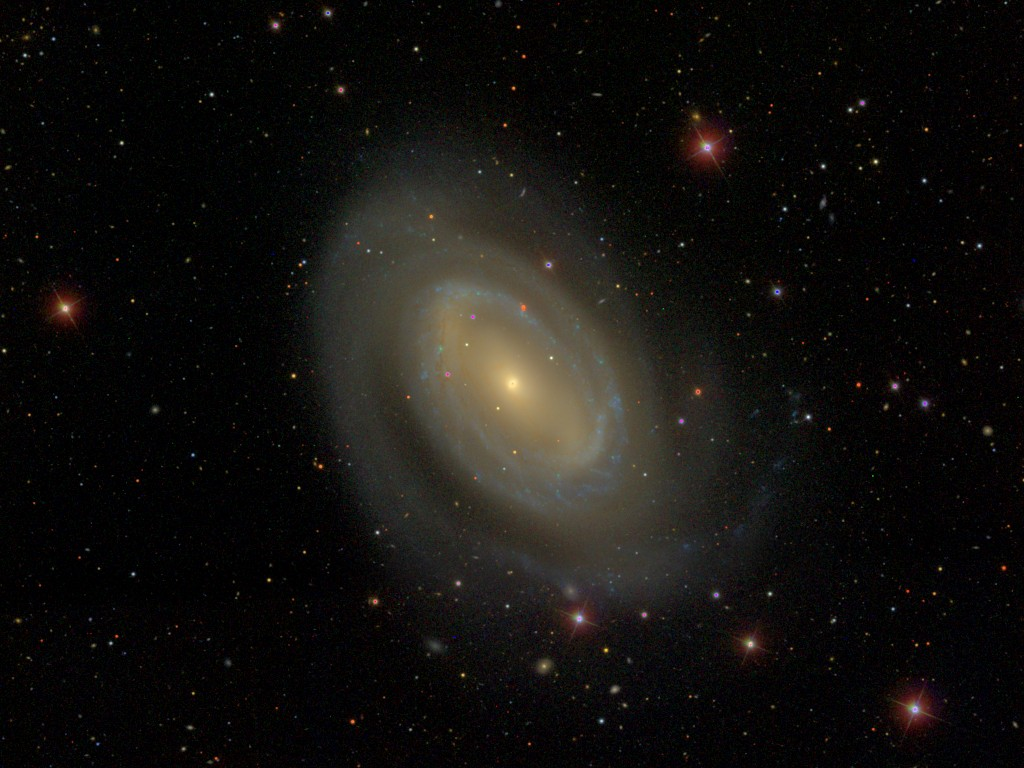

In [8]:
#SDSS
Image('n4725_SDSS.jpg', width=300)

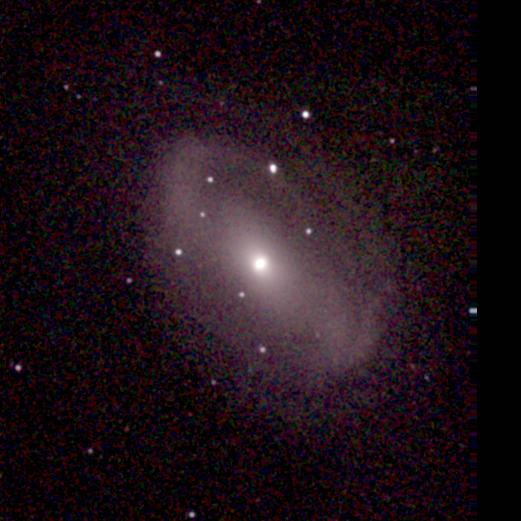

In [9]:
#JHK
Image('n4725_2MASS.jpg', width=300)

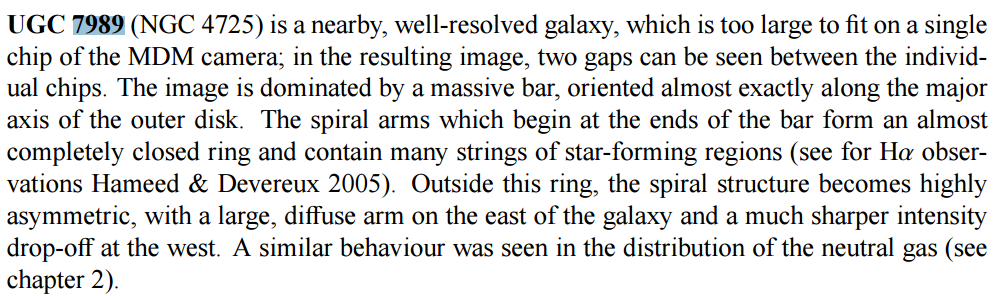

In [10]:
Image('noord_p113_cite.png')

## Кинематические данные по звездам

Дисперсии скоростей и кривая вращения - есть в Heraudeau 1999 http://adsabs.harvard.edu/cgi-bin/bib_query?1999A%26AS..136..509H до ~50'' (1 разрез), PA=$35^{\circ}$

#TODO: понять, исправлено ли за наклон

### Кривая вращения

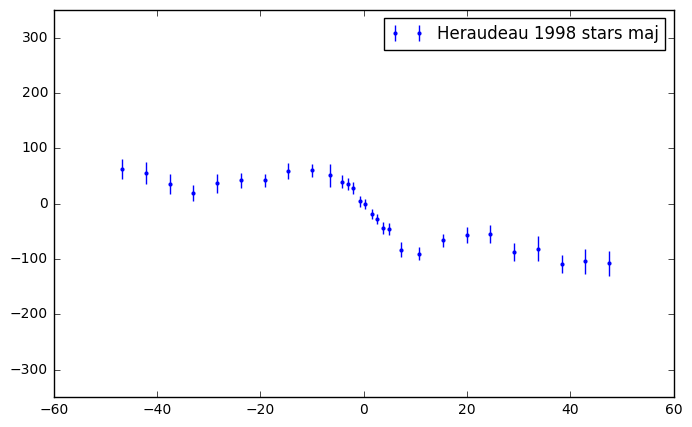

In [11]:
# Данные по звездной кинематике Heraudeau+1999 вдоль большой полуоси (не исправленные за наклон?) - из HYPERLEDA
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("her99_kinem.dat", float))

fig = plt.figure(figsize=[8,5])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='.', marker='.', mew=0, label="Heraudeau 1998 stars maj")
plt.legend()
plt.ylim(-350., 350.)
plt.show()

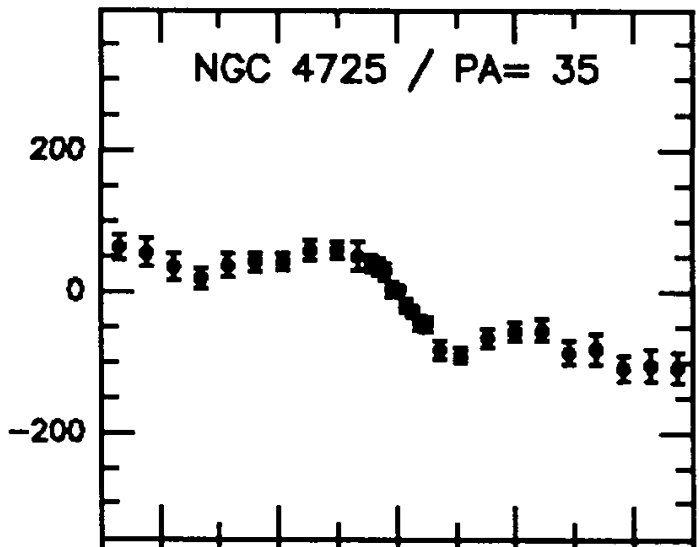

In [12]:
Image('her99_rot.png') #оригинал

Приближение:

In [13]:
r_ma_b, vel_ma_b, e_vel_b = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma)))

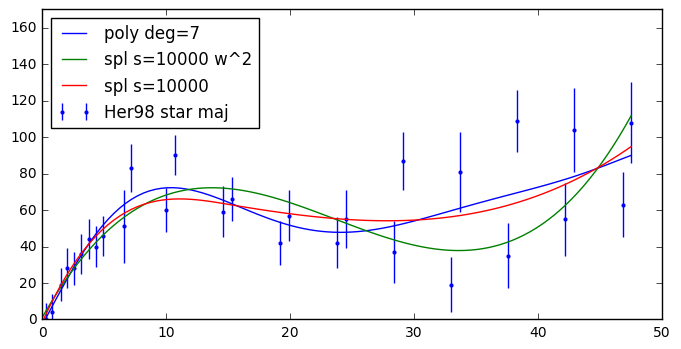

In [14]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=7')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000., w=w(e_vel_b))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=10000')

plt.legend(loc='upper left')
plt.ylim(0, 170)
plt.show()

C весами плохо получается, полином и обычный почти совпадают - берем их:

In [15]:
star_approx = spl

### Дисперсии

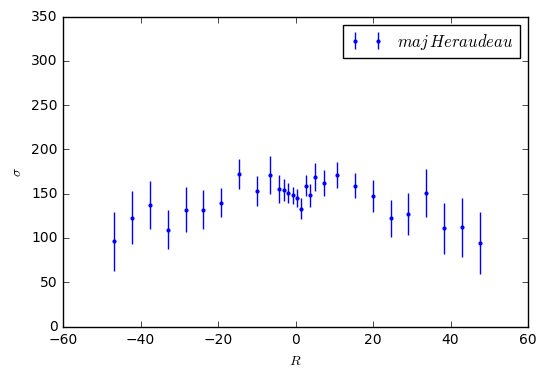

In [16]:
r_sig_ma = r_ma #Heraudeau+1999

fig = plt.figure(figsize=[6., 4.])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')

plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 350)
plt.legend()
plt.show()

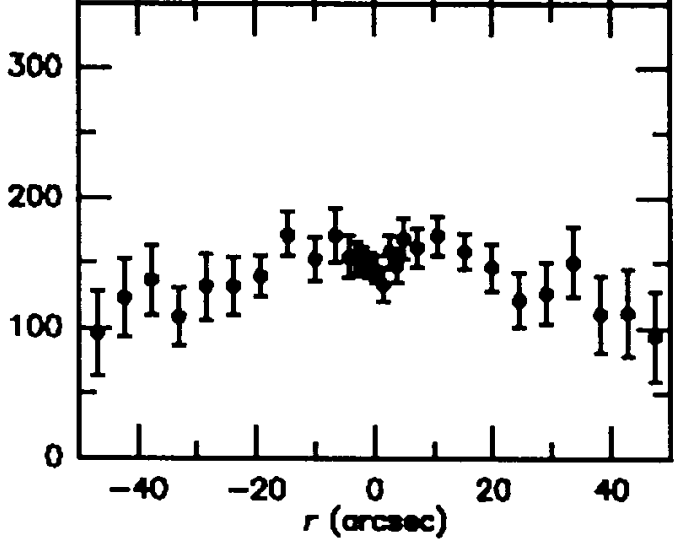

In [17]:
Image('her99_disp.png') #из статьи

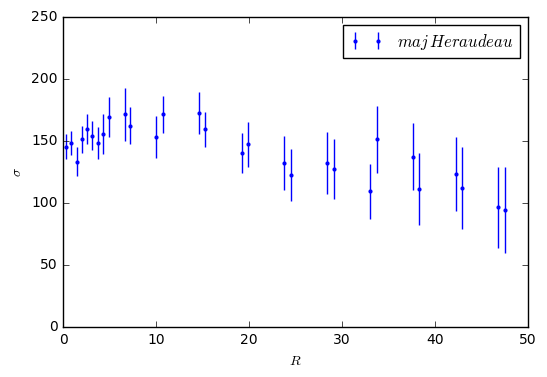

In [18]:
fig = plt.figure(figsize=[6., 4.])
plt.errorbar(map(abs, r_sig_ma), sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 250)
plt.legend()
plt.show()

Так как это большая ось, здесь нужны свои ограничения, например $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj} < \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sqrt{2}\sigma_{maj}}{\sin i},$$
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj} < \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sin i}$$ 

Попробуем еще честно приблизить:

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

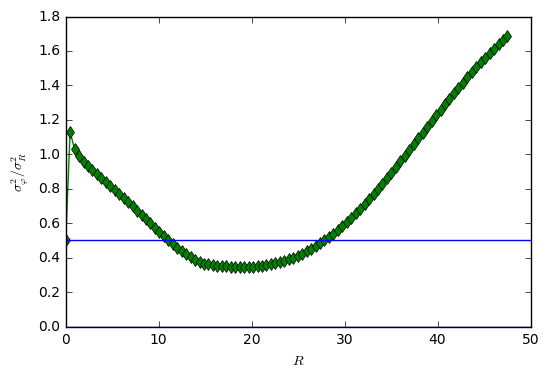

In [19]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


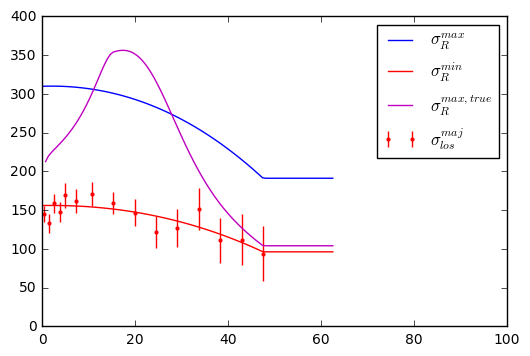

In [20]:
spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=10000.)
sig_lim = max(r_sig_ma)

def sig_R_max(r):
    if r < sig_lim:
        return spl_maj(r)*sqrt(2)/sin_i
    else:
        return spl_maj(sig_lim)*sqrt(2)/sin_i

def sig_R_max_true(r):
    if r < sig_lim:
        return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))
    else:
        return spl_maj(sig_lim)/sin_i/sqrt(sigPhi_to_sigR_real(sig_lim))   

def sig_R_min(r):
    if r < sig_lim:
        return spl_maj(r).item()
    else:
        return spl_maj(sig_lim).item()

    
points = np.linspace(0.1, max(r_sig_ma)+15., 100)

plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
# plt.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='red')
plt.plot(points, map(sig_R_max, points), label = '$\sigma_R^{max}$', color='blue')
plt.plot(points, map(sig_R_min, points), label = '$\sigma_R^{min}$', color='red')
plt.plot(points, map(sig_R_max_true, points), label = '$\sigma_R^{max,true}$', color='m')
plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

## Данные по газу

### Кривая вращения

* есть у Ноордермеера в виде точек на карте (но не в тезисах, а в статье http://adsabs.harvard.edu/cgi-bin/bib_query?2005A%26A...442..137N) $\rm{HI}$
* есть тут http://www.aanda.org/articles/aa/pdf/2011/06/aa16177-10.pdf (тоже WHISP $\rm{HI}$)

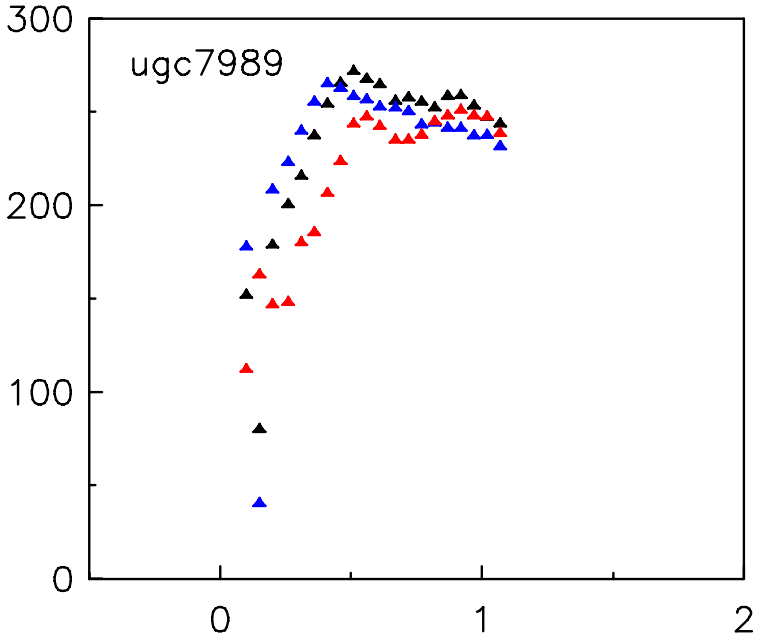

In [21]:
Image('HI_rot.png') #HI WHISP from van Eymeren 2011, PA=32.45, R25=25.91kpc, разные цвета - это две стороны, черная - усредненная

Достаточно странно расположились черные точки - не между двумя другими, выглядит неверным

(-0.5, 2.0)

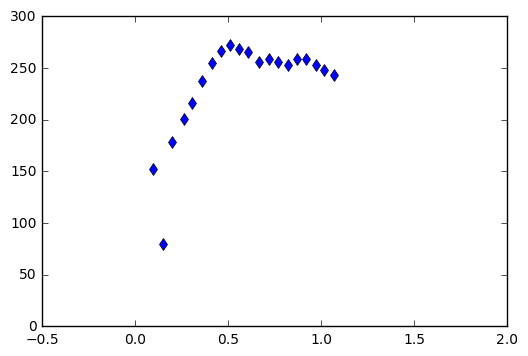

In [22]:
R25 = 25.91

# Данные по кинематике газа van Eymeren 2011 в HI
r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')
plt.ylim(0, 300)
plt.xlim(-0.5, 2.)

Из Ноордермеера:

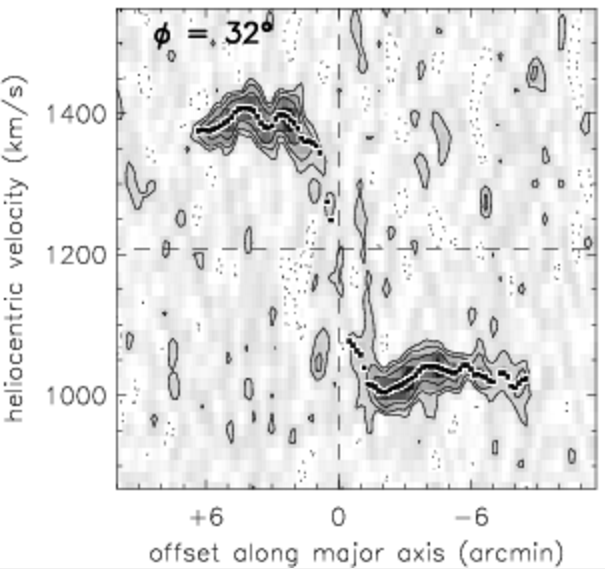

In [23]:
Image('noord_rot.png')

(-10.0, 11.0)

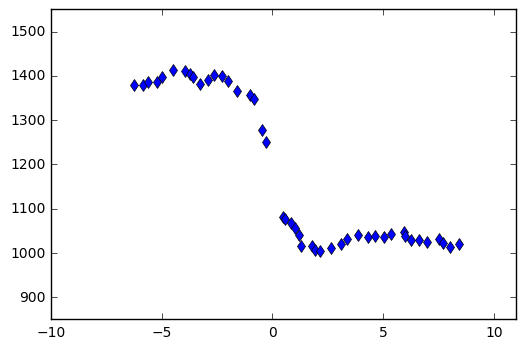

In [24]:
# Данные по кинематике газа van Eymeren 2011 в HI
r_n, vel_n = zip(*np.loadtxt("noord_rot.dat", float, delimiter=','))
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.ylim(850, 1550)
plt.xlim(-10., 11.)

In [25]:
vel_n = map(lambda l: l-1208., vel_n)
r_n, vel_n = zip(*sorted(zip(np.abs(r_n), np.abs(vel_n))))
r_n = [l*60 for l in r_n]

Посмотрим на согласие между измерениями:

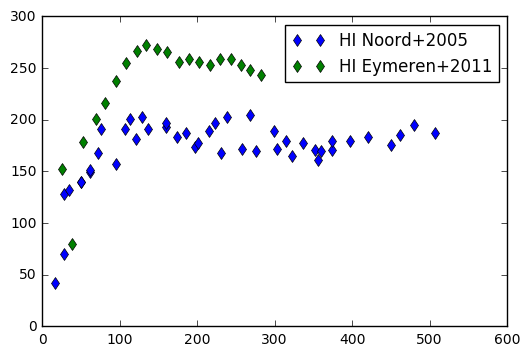

In [26]:
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend()
plt.show()

Похоже, что у Ноордермеера не нормировано на угол. Проверим:

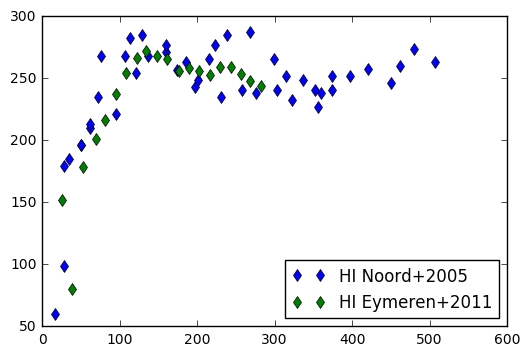

In [27]:
plt.plot(r_n, [l/sin_i for l in vel_n], 'd', label='HI Noord+2005')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend(loc='lower right')
plt.show()

Да, так и есть - данные хорошо совпали для исправленных за угол измерений Ноордермеера (даже для такой низкой точности снятия данных с рисунка). Странно, что у более новых данных протяженность значительно меньше. Для построения кривой возьмем более оба набора до $200^{''}$: 

In [28]:
r_hi = [l*R25/scale for l in r_hi]
vel_n = [l/sin_i for l in vel_n]

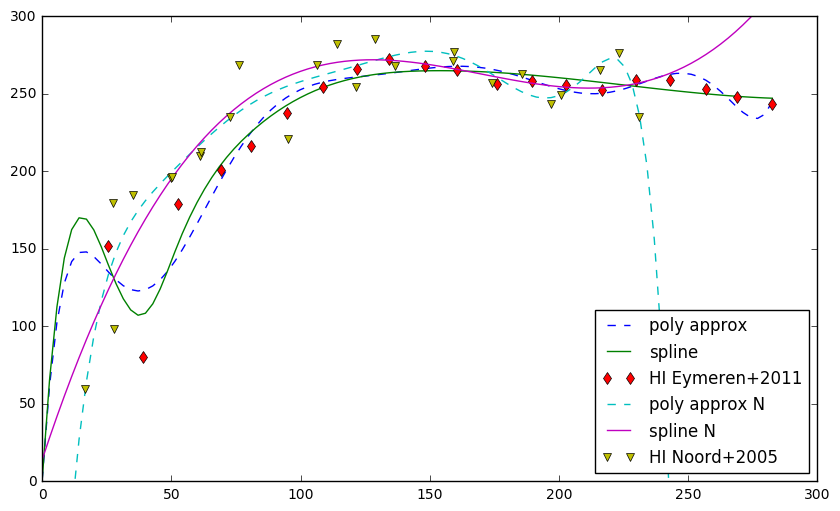

In [29]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi)
_2.extend(vel_hi)
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Похоже для данных Eymeren вторая точка все портит и вообще точность в нужной нам области хромает.

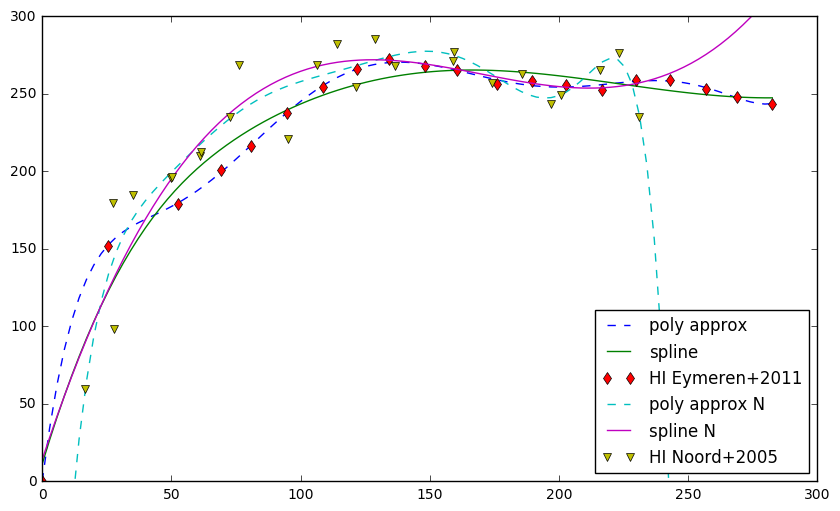

In [30]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi[1:])
_2.extend(vel_hi[1:])
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(_1, _2, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas_N = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas_N(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Если убрать эту точку - то сплайны почти совпадают, но все равно точность недостаточная.

TODO: поискать более точные данные - например CO

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

TODO: использовать $\varkappa$? точно ли тут газовая кривая?

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


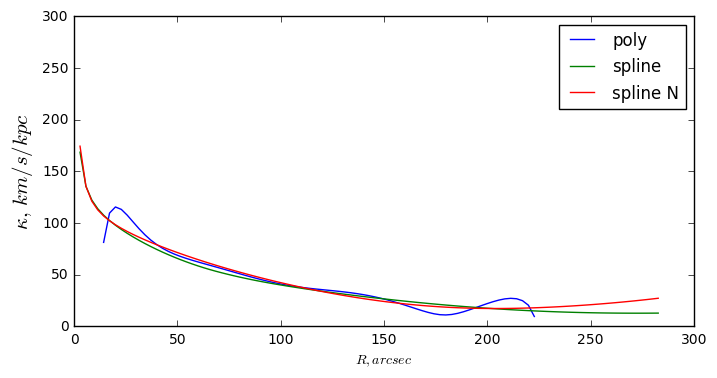

In [31]:
# TODO: move to utils
def epicyclicFreq_real(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R для сплайна или полинома'''
    try:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )
    except:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.derivative()(R) / poly_gas(R)) / (R * resolution )

fig = plt.figure(figsize=[8, 4])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.plot(test_points, [epicyclicFreq_real(spl_gas_N, x, scale) for x in test_points], '-', label='spline N')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 300)
plt.legend()
plt.show()

Достаточно сложно, учитывая что нас интересуют первые 50 секунд. Будем считать, что нас интересуют сплайны.

### Поверхностная плотность газа 

* $\Sigma_{HI}$ и $\Sigma_{H_2}$ https://arxiv.org/pdf/1608.06735v1.pdf
* $\Sigma_{HI}$ из Ноордермеера

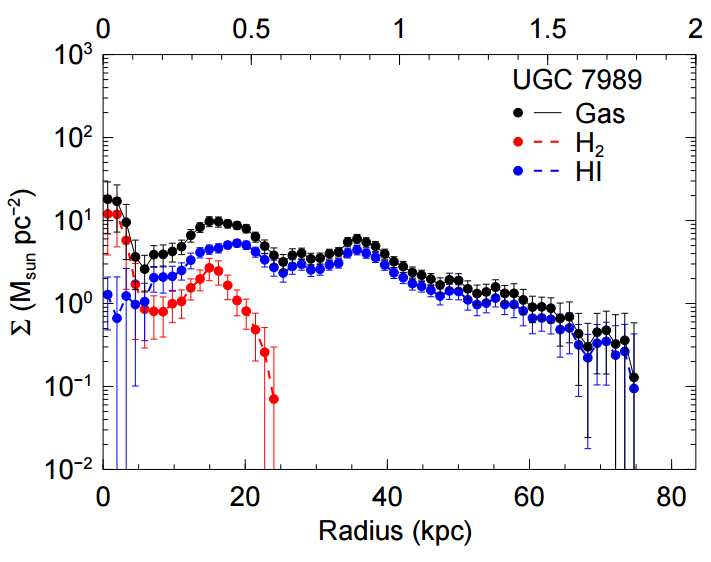

In [32]:
Image('u7989_gas_dens.png')

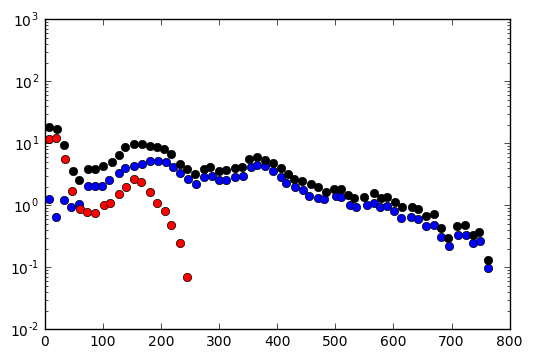

In [33]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_dens.dat", float, delimiter=','))

plt.semilogy([l/scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue')
plt.semilogy([l/scale for l in r_g_dens[58:77]], gas_dens[58:77], 'o', color='red')
plt.semilogy([l/scale for l in r_g_dens[77:]], gas_dens[77:], 'o', color='black')
plt.ylim(0.01, 1000)
plt.show()

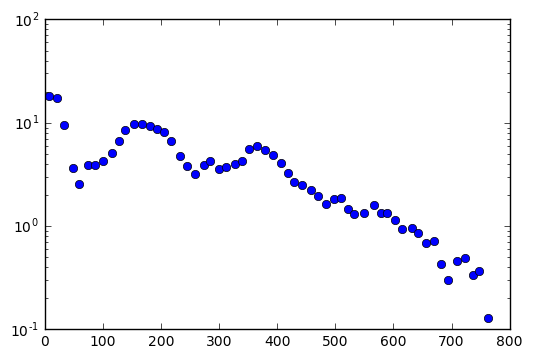

In [34]:
plt.semilogy([l/scale for l in r_g_dens[77:]], gas_dens[77:], 'o') #только сумма
plt.show()

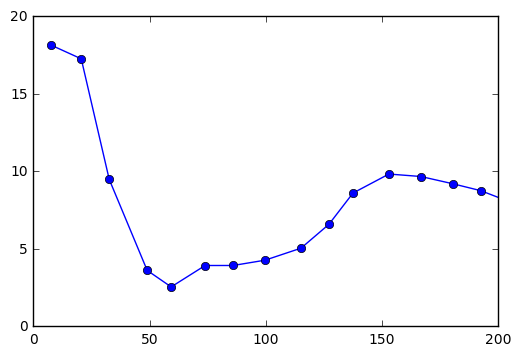

In [35]:
plt.plot([l/scale for l in r_g_dens[77:]], gas_dens[77:], '-o') #только сумма
plt.xlim(0, 200)
plt.show()

Ноордермеер:

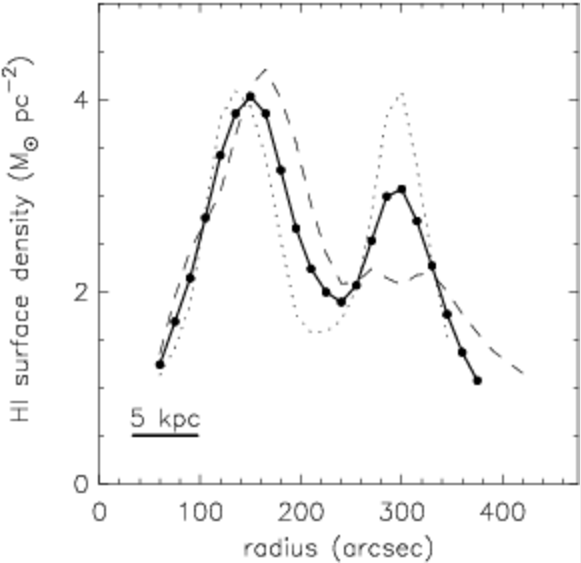

In [36]:
Image('noord_gdens.png')

In [37]:
r_g_n, gas_dens_n = zip(*np.loadtxt("HI_dens.dat", float, delimiter=','))

(0, 5)

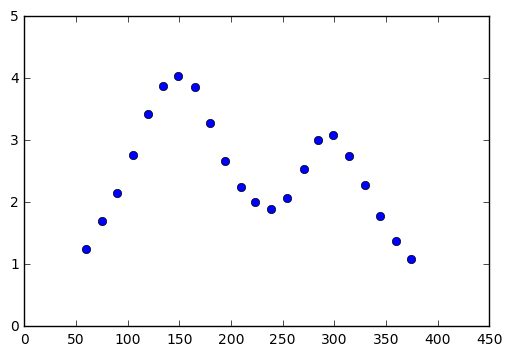

In [38]:
plt.plot(r_g_n, gas_dens_n, 'o')
plt.xlim(0, 450)
plt.ylim(0, 5)

Сравнение:

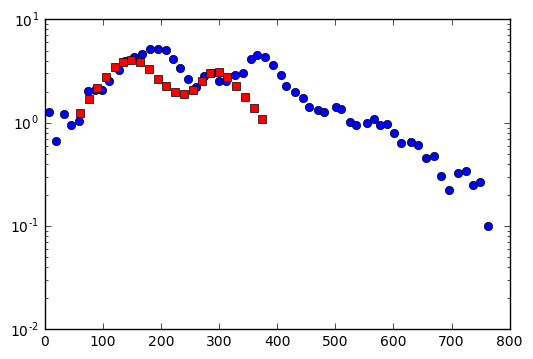

In [39]:
plt.semilogy([l/scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue')
plt.semilogy(r_g_n, gas_dens_n, 's', label='Noord HI', color='red')

Как и было изначально видно - пики заметно смещены, но все это за пределами нашего интереса. Используем более современный газ $\rm{HI}$ + $\rm{HII}$:

In [40]:
r_g_dens, gas_dens = [l/scale for l in r_g_dens[77:]], gas_dens[77:] #используем только полный газ

## Данные по фотометрии

* декомпозиция в $J$, $H$, $K$ из http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf (без профилей)
* древняя в $r$ http://adsabs.harvard.edu/cgi-bin/bib_query?1985ApJS...59..115K
* судя по всему она есть в S4G (например №1287 в данных тут http://adsabs.harvard.edu/cgi-bin/bib_query?2015ApJS..219....4S)


TODO:подумать про S4G 

In [41]:
mu0d_J = 17.78
h_disc_J = 49.99
mu0d_H = 17.11
h_disc_H = 50.28
mu0d_K = 17.01
h_disc_K = 54.66

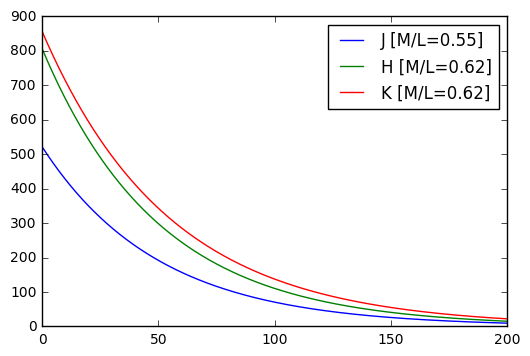

In [42]:
p_ = np.arange(0.1, 200., 0.1)

b_v_color = 0.012 #TODO: не знаем на самом деле какой цвет (вот тут https://arxiv.org/pdf/1102.1724v1.pdf указано 0.012)
# тут https://arxiv.org/pdf/astro-ph/0610688v2.pdf есть B и V в Янских

M_to_L_J = bell_mass_to_light(b_v_color, 'J', 'B-V')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_v_color, 'H', 'B-V')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_v_color, 'K', 'B-V')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

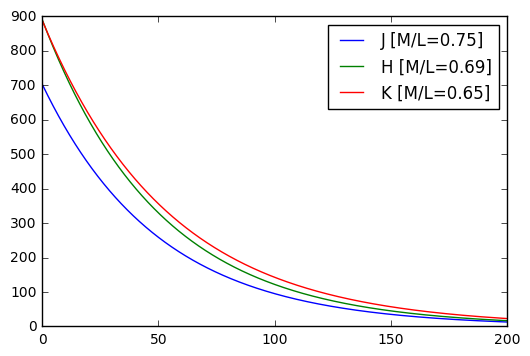

In [43]:
p_ = np.arange(0.1, 200., 0.1)

b_r_color = 0.55 #вот отсюда древнее B-R https://ui.adsabs.harvard.edu/#abs/1995AJ....109..543B/abstract

M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

Разница, как мы видим, не столь существенная.

## Зоны звездообразования


$H_{\alpha}$ , $UV$

есть $H_{\alpha}$ в Hameed 2005 http://iopscience.iop.org/article/10.1086/430211/pdf

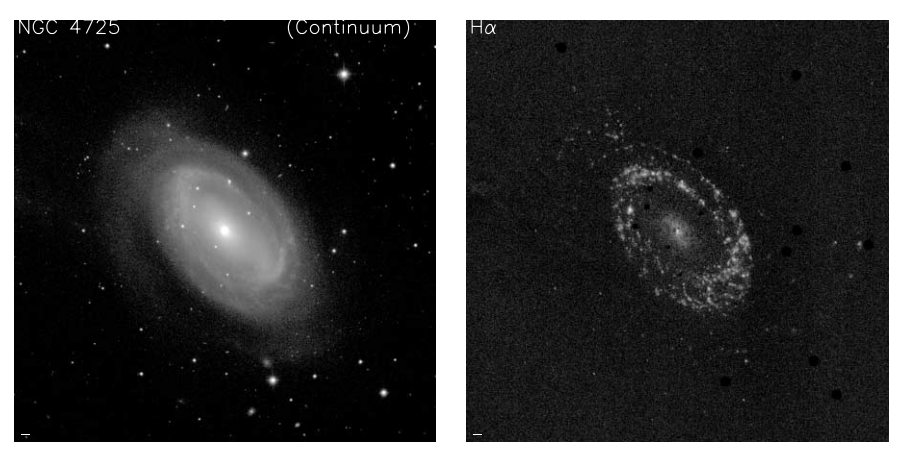

In [44]:
Image('n4725_halpha.png')

(0, 200)

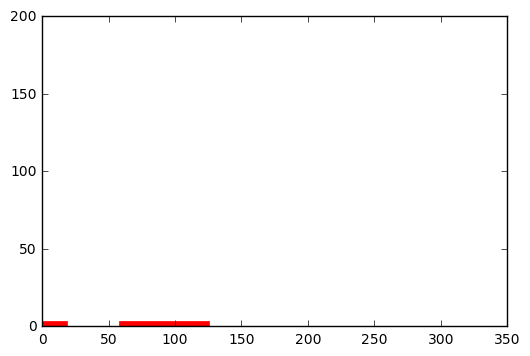

In [45]:
# TODO: разобраться и сделать обоснованно 
def plot_SF(ax):
    ax.plot([0., 1.5/scale], [0., 0.], '-', lw=7., color='red')
    ax.plot([6./scale, 12./scale], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

In [46]:
# from instabilities import * # загружаем функции

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [47]:
sound_vel = 6  #скорость звука в газе, км/с

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


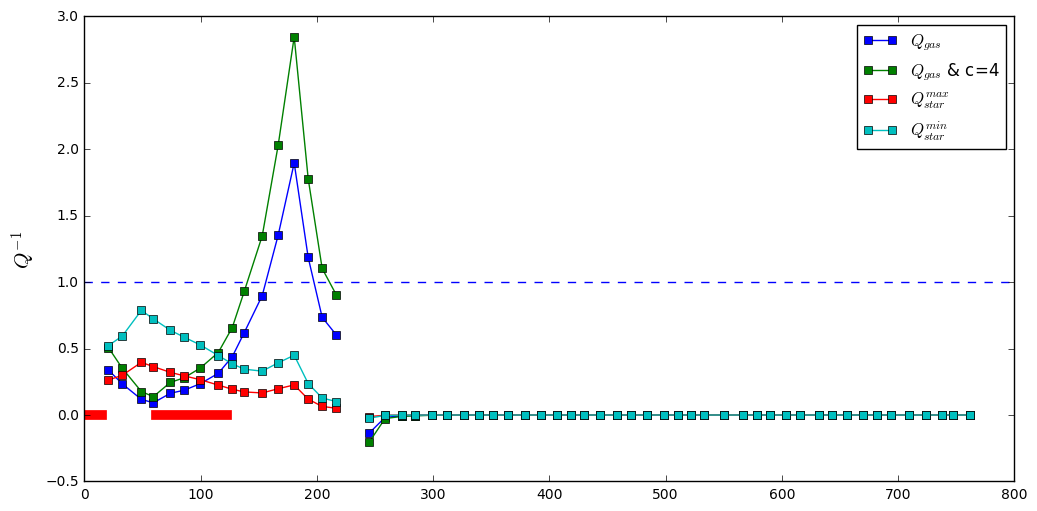

In [48]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_max, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_min, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Видно, что в центре с кучей газа неустойчивость, но эффект быстро спадает.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

In [49]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

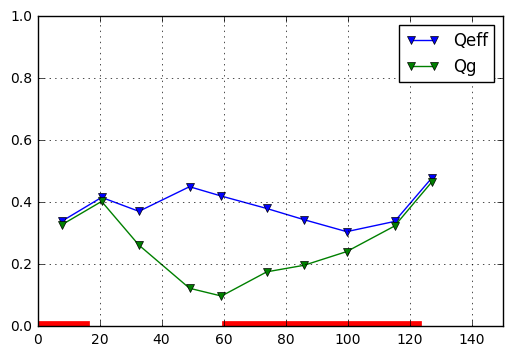

In [50]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

In [51]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_max_true,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

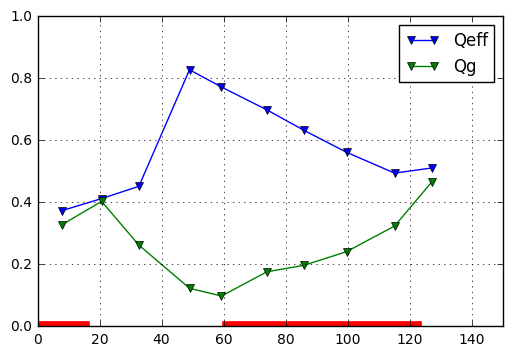

In [52]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Другая оценка $\sigma_R$: 

In [53]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

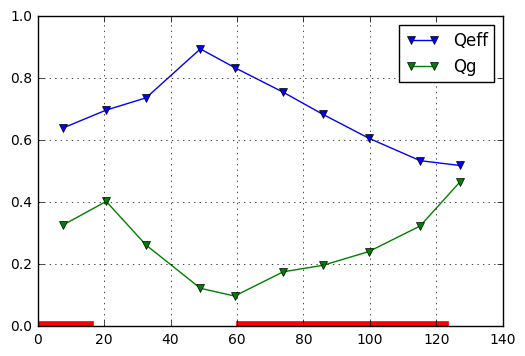

In [54]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
# plt.xlim(0., 8./0.072)
plt.legend()
plt.grid()
plot_SF(plt.gca())
plt.show()

Достаточно интересно - есть тенденция на начало неустойчивости (даже без 1.6) как раз в области звездообразования - но у нас дальше нет данных.

## Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

## Эксперименты

TODO: сформировать summary сохраняя отдельные картинки

In [55]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(2,2,figsize=[16,16], sharex=True)
    fig.tight_layout()
    axes[0][0].plot(r_g_dens, gas_dens, 'd-')
    axes[0][0].set_title('HI gas')
    axes[0][0].grid()
    
    axes[0][1].plot(r_g_dens, [surfaceDensityStarR(ml, h_disc, r, mu0_c_R) for r in r_g_dens], '-')
    axes[0][1].set_title('Photometry')
    axes[0][1].grid()
    
    axes[1][0].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
    axes[1][0].plot(points, spl_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')
    axes[1][0].plot(points, map(sig_R_approx, points), label = '$\sigma_R^{max}$', color='blue')
    axes[1][0].grid()
#     r_g = r_g_dens[1:7]
#     g_d = np.array(gas_dens[1:7])*1.44
#     star_density = [surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_R) for r in r_g]
#     epicycl = lambda l: epicyclicFreq_real(gas_approx, l, scale)
#     invQeff = calc_Qeffs(r_g_dens=r_g, gas_dens=g_d, epicycl=epicycl, 
#                          sound_vel=sound_vel, star_density=star_density, sigma=sig_R_approx, verbose=True)
    axes[1][1].plot(r_g, map(lambda l: 1./l, Qgs), '.-', label='Qg')
    axes[1][1].plot(r_g, invQeff, 'v-', label='Qeff^{-1}')
    axes[1][1].set_ylim(0., 1.)
#     axes[1][1].xlim(0., 8./0.072)
    axes[1][1].legend()
    axes[1][1].grid()
    
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight')
    plt.show()

NameError: global name 'surfaceDensityStarR' is not defined

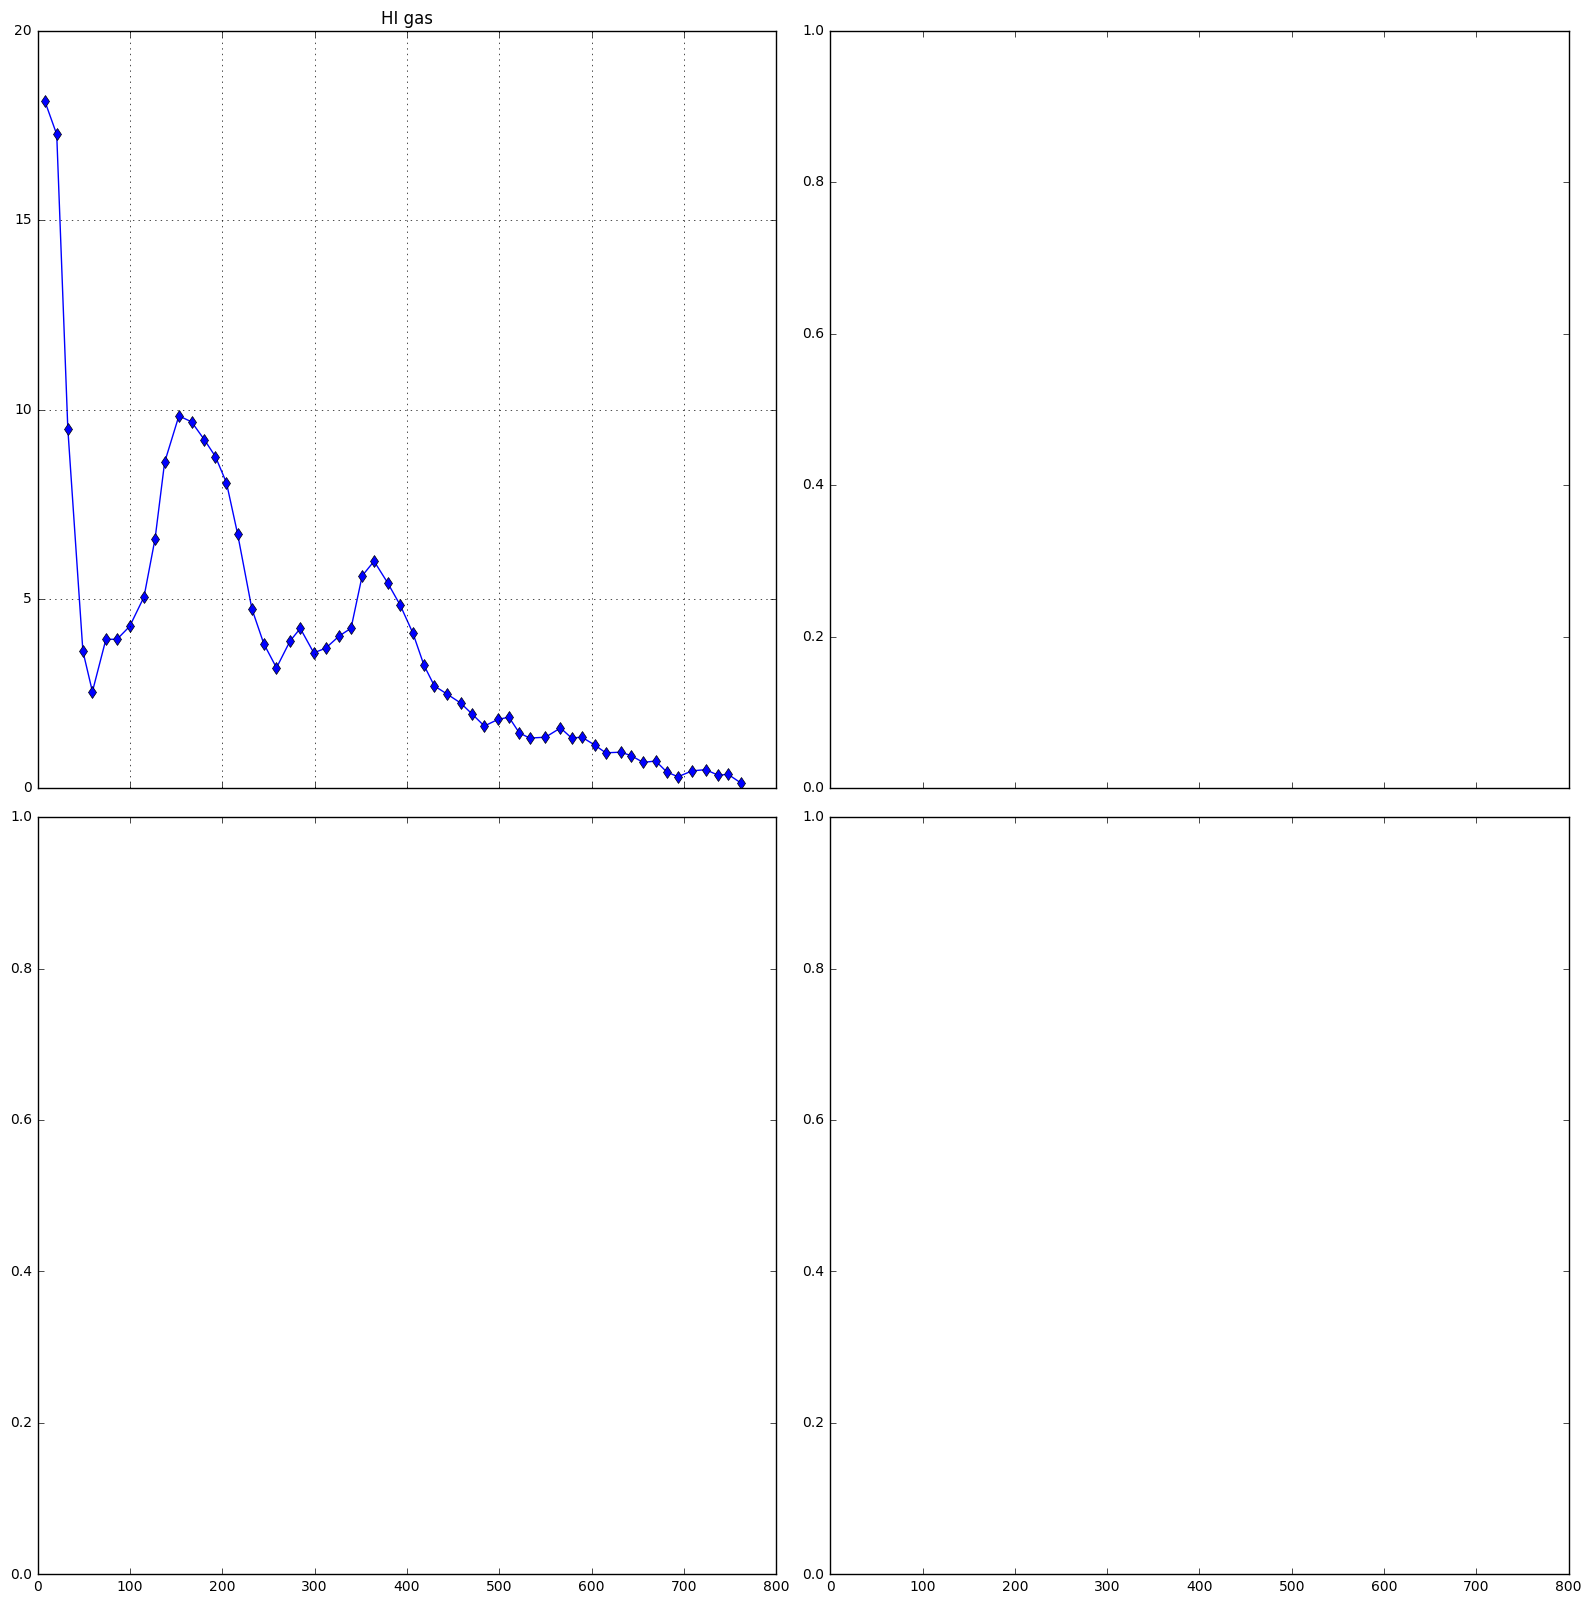

In [56]:
save_model_plot(summary_imgs_path)